## Importando Utilitários

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PrettyPrint import PrettyPrintTree
from morpho_package import *

## Gerando imagem para exemplo

array([[4, 7, 5, 0, 3],
       [3, 3, 7, 1, 3],
       [5, 2, 4, 7, 6],
       [0, 0, 4, 2, 1],
       [6, 7, 7, 6, 0]])

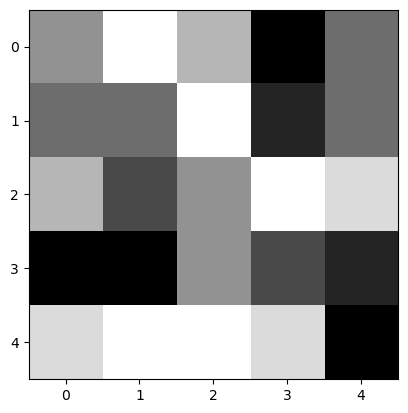

In [2]:
np.random.seed(0)
img = np.random.randint(0, 8, (5, 5))
plt.imshow(img, 'gray', )
img

## Computar Upper Level Sets

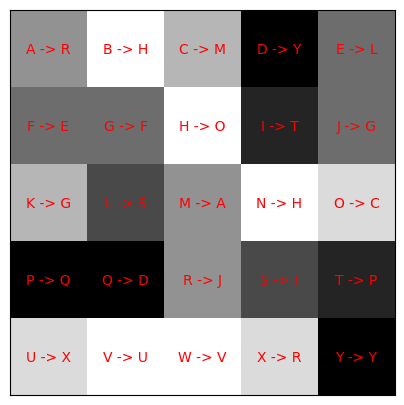

In [3]:
upper_level_sets = UpperLevelSets(img, Adjacency8())
upper_level_sets.computeTree()
upper_level_sets.showParents()

## Max-tree (Canonizando os pixels)

'Pixels Canônicos: [24, 19, 18, 4, 17, 10, 2, 14, 23, 7, 21]'

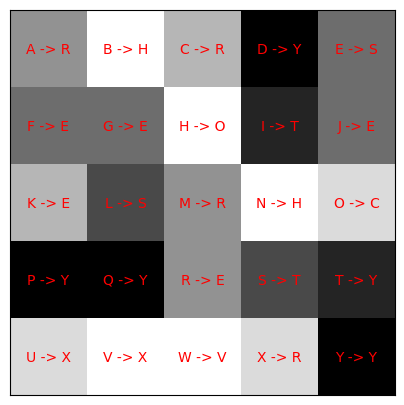

In [4]:
maxtree = MaxTree(img, Adjacency8())
maxtree.showParents()
f'Pixels Canônicos: {list(maxtree.nodes.keys())}'

In [5]:
maxtree.displayTree()

                            Representant: 24       
                            Level: 0               
                            Parent: 24             
                            CNPs: [24, 3, 16, 15]  
                            Children Nodes: [19]   
                                      |
                             Representant: 19     
                             Level: 1             
                             Parent: 24           
                             CNPs: [19, 8]        
                             Children Nodes: [18] 
                                      |
                             Representant: 18    
                             Level: 2            
                             Parent: 19          
                             CNPs: [18, 11]      
                             Children Nodes: [4] 
                                      |
                           Representant: 4          
                           Level: 3                 
         

## Computando Lower Level Sets

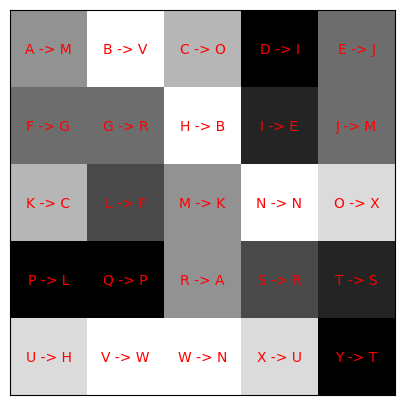

In [6]:
lower_level_sets = LowerLevelSets(img, Adjacency8())
lower_level_sets.computeTree()
lower_level_sets.showParents()

## Min-Tree (Canonizando os pixels)

'Pixels Canônicos: [13, 20, 2, 12, 9, 6, 11, 18, 8, 19, 15, 3, 24]'

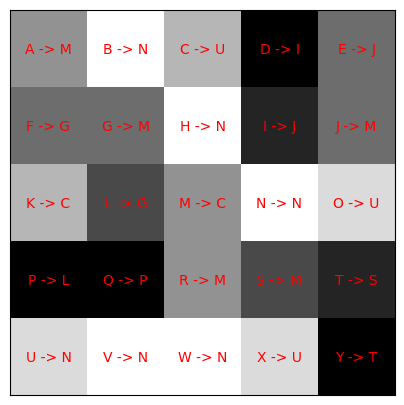

In [7]:
mintree = MinTree(img, Adjacency8())
mintree.showParents()
f'Pixels Canônicos: {list(mintree.nodes.keys())}'

In [8]:
mintree.displayTree()

                    Representant: 13          
                    Level: 7                  
                    Parent: 13                
                    CNPs: [13, 22, 21, 1, 7]  
                    Children Nodes: [20]      
                                |
                       Representant: 20    
                       Level: 6            
                       Parent: 13          
                       CNPs: [20, 23, 14]  
                       Children Nodes: [2] 
                                |
                       Representant: 2      
                       Level: 5             
                       Parent: 20           
                       CNPs: [2, 10]        
                       Children Nodes: [12] 
                                |
                    Representant: 12           
                    Level: 4                   
                    Parent: 2                  
                    CNPs: [12, 0, 17]          
                    Childr